In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from collections import OrderedDict
from tabulate import tabulate

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Classificadores:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm

# CLASSIFICAÇÃO DO DATASET CREDIT SCORE
### Carregando o dataset tratado

In [2]:
train_path = 'archive/ready_train_occ.csv'
test_path  = 'archive/ready_test_occ.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
#test_df = test_df.drop(columns = "Unnamed: 0")
#df = df.drop(columns = 'Unnamed: 0')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   23                  99999 non-null  int64  
 1   1824.8433333333328  99999 non-null  float64
 2   3                   99999 non-null  int64  
 3   4                   99999 non-null  int64  
 4   3.1                 99999 non-null  int64  
 5   4.1                 99999 non-null  int64  
 6   3.2                 99999 non-null  int64  
 7   7                   99999 non-null  int64  
 8   11.27               99999 non-null  float64
 9   4.2                 99999 non-null  int64  
 10  809.98              99999 non-null  float64
 11  26.822619623699016  99999 non-null  float64
 12  0                   99999 non-null  int64  
 13  49.57494921489417   99999 non-null  float64
 14  80.41529543900253   99999 non-null  float64
 15  312.49408867943663  99999 non-null  float64
 16  1   

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   23                  49999 non-null  int64  
 1   1824.8433333333328  49999 non-null  float64
 2   3                   49999 non-null  int64  
 3   4                   49999 non-null  int64  
 4   3.1                 49999 non-null  int64  
 5   4.1                 49999 non-null  int64  
 6   3.2                 49999 non-null  int64  
 7   7                   49999 non-null  int64  
 8   11.27               49999 non-null  float64
 9   4.2                 49999 non-null  int64  
 10  809.98              49999 non-null  float64
 11  35.03040185583525   49999 non-null  float64
 12  0                   49999 non-null  int64  
 13  49.57494921489417   49999 non-null  float64
 14  236.64268203272132  49999 non-null  float64
 15  186.26670208571767  49999 non-null  float64
 16  1   

In [4]:
train_df

,23,1824.8433333333328,3,4,3.1,4.1,3.2,7,11.27,4.2,...,312.49408867943663,1,1.0,0.0,0.0.1,1.0.1,0.0.2,0.0.3,0.0.4,0.0.5
0,23,1824.843333,3,4,3,4,0,6,11.270000,4,...,284.629162,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,23,1824.843333,3,4,3,4,3,7,10.906364,4,...,331.209863,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23,1824.843333,3,4,3,4,5,4,6.270000,4,...,223.451310,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,1824.843333,3,4,3,4,6,6,11.270000,4,...,341.489231,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,23,1824.843333,3,4,3,4,8,4,9.270000,4,...,340.479212,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,3359.415833,4,6,7,2,23,7,11.500000,3,...,395.684889,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99995,25,3359.415833,4,6,7,2,18,7,11.500000,3,...,395.684889,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
99996,25,3359.415833,4,6,7,2,27,6,11.500000,3,...,395.684889,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99997,25,3359.415833,4,6,7,2,20,6,11.500000,3,...,395.684889,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [5]:
train_data = train_df.values
test_x = test_df.values



train_x = train_data[: , :-1]
train_y = train_data[:, -1]

In [6]:
print(train_x, '\n\n', train_y, '\n\n', test_x)

[[2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.50000000e+01 3.35941583e+03 4.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.50000000e+01 3.35941583e+03 4.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.50000000e+01 3.35941583e+03 4.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

 [0. 0. 0. ... 1. 2. 1.] 

 [[2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.30000000e+01 1.82484333e+03 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.50000000e+01 3.35941583e+03 4.00000000e+00 ... 1.00000000e+00
  

## Normalização dos atributos

Vamos então, primeiramente, normalizar os dados que vamos analsar. A ideia inicial é de fazer com no maximo 4 atributos de maneira didatica e depois aplicar para os demais

In [7]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(
                                       train_x, 
                                       train_y, 
                                       test_size=0.1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

## Criando dicionarios
Criaremos dicionarios para guardarmos valores de acuracia, precisão e recall para fazermos uma tabela que demonstra todos os valores de saida para cada classificador utilizado

Fonte da ideia: [Credit Score Classification By Vishal Sai Gadge](https://www.kaggle.com/code/gadigevishalsai/credit-score-classification-eda-classification)

In [9]:
model_accuracy = OrderedDict()
model_precision = OrderedDict()
model_recall = OrderedDict()

## Classificador KNN

Usaremos tanto as funções de normalização: 

StandardScaler (coloca todos os atributos em um intervalo ((x - u) / s), sendo x o valor do atributo, u o valor da media dos valores e s o desvio padrão das amostras) 


MinMaxScaler (coloca todos os atributos em um intervalo de 0's e 1's)

In [10]:
#resetando os valores para os valores de entrada
x_train, x_test, y_train, y_test = train_test_split(
                                       train_x, 
                                       train_y, 
                                       test_size=0.3,
                                       random_state = 27, 
                                       shuffle = True)


# Normalizando com o MinMax
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

In [11]:
# Aplicando para 1 vizinho
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.59      0.59      5254
         1.0       0.67      0.66      0.67      8743
         2.0       0.73      0.73      0.73     16003

    accuracy                           0.69     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.69      0.69      0.69     30000



In [12]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn1_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['1 - Nearest Neighbors'] = nn1_accuracy

nn1_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['1 - Nearest Neighbors'] = nn1_precision

nn1_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['1 - Nearest Neighbors'] = nn1_recall

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))

[[ 3111   329  1814]
 [  361  5786  2596]
 [ 1741  2528 11734]]
The accuracy of this model is 68.77 %.
The precision of this model is 68.73 %.
The recall of this model is 68.77 %.


In [13]:
# Aplicando para 3 vizinhos

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.62      0.58      5254
         1.0       0.69      0.65      0.67      8743
         2.0       0.74      0.73      0.73     16003

    accuracy                           0.69     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.69      0.69      0.69     30000



In [14]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn3_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['3 - Nearest Neighbors'] = nn3_accuracy

nn3_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['3 - Nearest Neighbors'] = nn3_precision

nn3_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['3 - Nearest Neighbors'] = nn3_recall

print('The accuracy of this model is {} %.'.format(nn3_accuracy))
print('The precision of this model is {} %.'.format(nn3_precision))
print('The recall of this model is {} %.'.format(nn3_recall))

[[ 3249   226  1779]
 [  733  5641  2369]
 [ 2038  2266 11699]]
The accuracy of this model is 68.63 %.
The precision of this model is 69.05 %.
The recall of this model is 68.63 %.


In [15]:
# Aplicando para 5 vizinhos

neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59      5254
         1.0       0.68      0.65      0.67      8743
         2.0       0.74      0.73      0.74     16003

    accuracy                           0.69     30000
   macro avg       0.66      0.67      0.66     30000
weighted avg       0.69      0.69      0.69     30000



In [16]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn5_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['5 - Nearest Neighbors'] = nn5_accuracy

nn5_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['5 - Nearest Neighbors'] = nn5_precision

nn5_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['5 - Nearest Neighbors'] = nn5_recall

print('The accuracy of this model is {} %.'.format(nn5_accuracy))
print('The precision of this model is {} %.'.format(nn5_precision))
print('The recall of this model is {} %.'.format(nn5_recall))

[[ 3286   286  1682]
 [  708  5694  2341]
 [ 1922  2360 11721]]
The accuracy of this model is 69.0 %.
The precision of this model is 69.34 %.
The recall of this model is 69.0 %.


In [17]:
# Aplicando para 7 vizinhos

neigh = KNeighborsClassifier(n_neighbors = 7)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59      5254
         1.0       0.69      0.65      0.67      8743
         2.0       0.74      0.74      0.74     16003

    accuracy                           0.69     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.70      0.69      0.69     30000



In [18]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn7_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['7 - Nearest Neighbors'] = nn7_accuracy

nn7_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['7 - Nearest Neighbors'] = nn7_precision

nn7_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['7 - Nearest Neighbors'] = nn7_recall

print('The accuracy of this model is {} %.'.format(nn7_accuracy))
print('The precision of this model is {} %.'.format(nn7_precision))
print('The recall of this model is {} %.'.format(nn7_recall))

[[ 3300   231  1723]
 [  700  5647  2396]
 [ 1880  2269 11854]]
The accuracy of this model is 69.34 %.
The precision of this model is 69.62 %.
The recall of this model is 69.34 %.


In [19]:
# Aplicando para 9 vizinhos

neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.55      0.64      0.59      5254
         1.0       0.70      0.64      0.67      8743
         2.0       0.74      0.74      0.74     16003

    accuracy                           0.69     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.70      0.69      0.69     30000



In [20]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

nn9_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['9 - Nearest Neighbors'] = nn9_accuracy

nn9_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['9 - Nearest Neighbors'] = nn9_precision

nn9_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['9 - Nearest Neighbors'] = nn9_recall

print('The accuracy of this model is {} %.'.format(nn9_accuracy))
print('The precision of this model is {} %.'.format(nn9_precision))
print('The recall of this model is {} %.'.format(nn9_recall))

[[ 3355   169  1730]
 [  753  5566  2424]
 [ 1959  2179 11865]]
The accuracy of this model is 69.29 %.
The precision of this model is 69.69 %.
The recall of this model is 69.29 %.


Plotando em grafico:

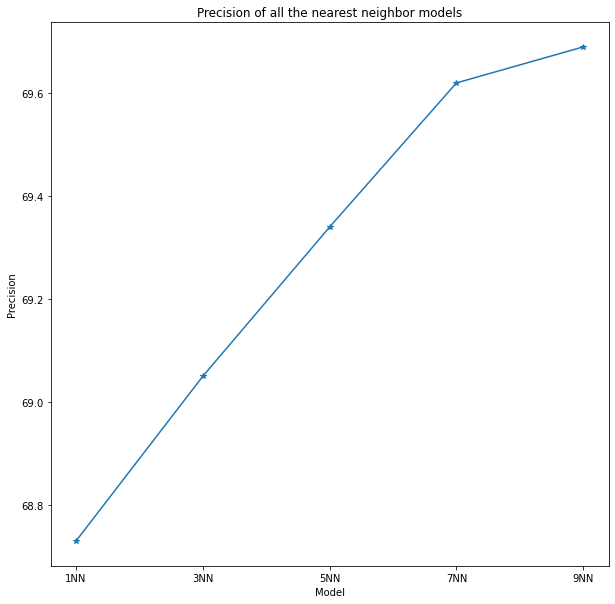

In [21]:
labels = ['1NN', '3NN', '5NN', '7NN', '9NN']
values = [nn1_precision, nn3_precision, nn5_precision, nn7_precision, nn9_precision]

plt.figure(figsize = [10, 10])
plt.title('Precision of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.plot(labels, values, '*-')
plt.show()

## RandomForestClassifier

Utilizaremos o RandomForestClassifier como classificador por conta da sua dinamica de aprofundamento, dividindo-se em varios subproblemas do dataset e classifica-os com base nisso

Faremos com que tenha diversos valores de arvores para termos uma noção melhor de como o codigo reage em diferentes numeros de avores de decisão

Sendo esses valores (10, 50, 75, 100)

Utilizaremos a normalização standard para os atributos, por conta de que o RandomForest aceita valores em diversas escalas, e em testes anteriores vimos que o MinMax como normalizador para RandomForest acaba perdendo muita sua precisão e recall

In [22]:
#resetando os valores para os valores de entrada
x_train, x_test, y_train, y_test = train_test_split(
                                       train_x, 
                                       train_y, 
                                       test_size=0.1)


# Normalizando com o standardscaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Após a normalização dos dados, fazemos a classificação com o randomforest de modo default para vermos seu comportamento

In [23]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 27)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      1811
         1.0       0.76      0.82      0.79      2817
         2.0       0.83      0.79      0.81      5372

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.79      0.79      0.79     10000



In [24]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf10_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['10 - Random Forest'] = rf10_accuracy

rf10_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['10 - Random Forest'] = rf10_precision

rf10_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['10 - Random Forest'] = rf10_recall

print('The accuracy of this model is {} %.'.format(rf10_recall))
print('The precision of this model is {} %.'.format(rf10_recall))
print('The recall of this model is {} %.'.format(rf10_recall))

[[1379   17  415]
 [  32 2312  473]
 [ 450  695 4227]]
The accuracy of this model is 79.18 %.
The precision of this model is 79.18 %.
The recall of this model is 79.18 %.


In [25]:
# aplicando 50 arvores
rfc = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state = 27)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77      1811
         1.0       0.78      0.83      0.81      2817
         2.0       0.83      0.81      0.82      5372

    accuracy                           0.81     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000



In [26]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf50_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['50 - Random Forest'] = rf50_accuracy

rf50_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['50 - Random Forest'] = rf50_precision

rf50_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['50 - Random Forest'] = rf50_recall

print('The accuracy of this model is {} %.'.format(rf50_recall))
print('The precision of this model is {} %.'.format(rf50_recall))
print('The recall of this model is {} %.'.format(rf50_recall))

[[1377   11  423]
 [  17 2347  453]
 [ 386  635 4351]]
The accuracy of this model is 80.75 %.
The precision of this model is 80.75 %.
The recall of this model is 80.75 %.


In [27]:
# aplicando 75 arvores
rfc = RandomForestClassifier(n_estimators = 75, criterion = 'gini', random_state = 27)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77      1811
         1.0       0.79      0.83      0.81      2817
         2.0       0.83      0.81      0.82      5372

    accuracy                           0.81     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000



In [28]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf75_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['75 - Random Forest'] = rf75_accuracy

rf75_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['75 - Random Forest'] = rf75_precision

rf75_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['75 - Random Forest'] = rf75_recall

print('The accuracy of this model is {} %.'.format(rf75_recall))
print('The precision of this model is {} %.'.format(rf75_recall))
print('The recall of this model is {} %.'.format(rf75_recall))

[[1387   11  413]
 [  17 2344  456]
 [ 381  621 4370]]
The accuracy of this model is 81.01 %.
The precision of this model is 81.01 %.
The recall of this model is 81.01 %.


In [29]:
# aplicando 100 arvores
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 27)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      1811
         1.0       0.79      0.83      0.81      2817
         2.0       0.84      0.81      0.82      5372

    accuracy                           0.81     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.81      0.81     10000



In [30]:
### Making the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

### Printing the accuracy, precision, and recall of the model

rf100_accuracy = round(100 * accuracy_score(y_test, y_pred), 2)
model_accuracy['100 - Random Forest'] = rf100_accuracy

rf100_precision = round(100 * precision_score(y_test, y_pred, average = 'weighted'), 2)
model_precision['100 - Random Forest'] = rf100_precision

rf100_recall = round(100 * recall_score(y_test, y_pred, average = 'weighted'), 2)
model_recall['100 - Random Forest'] = rf100_recall

print('The accuracy of this model is {} %.'.format(rf100_recall))
print('The precision of this model is {} %.'.format(rf100_recall))
print('The recall of this model is {} %.'.format(rf100_recall))

[[1394   10  407]
 [  19 2344  454]
 [ 386  625 4361]]
The accuracy of this model is 80.99 %.
The precision of this model is 80.99 %.
The recall of this model is 80.99 %.


Vemos então que o RandomForest tem uma melhor precisão e um melhor recall do que o KNN para esse dataset

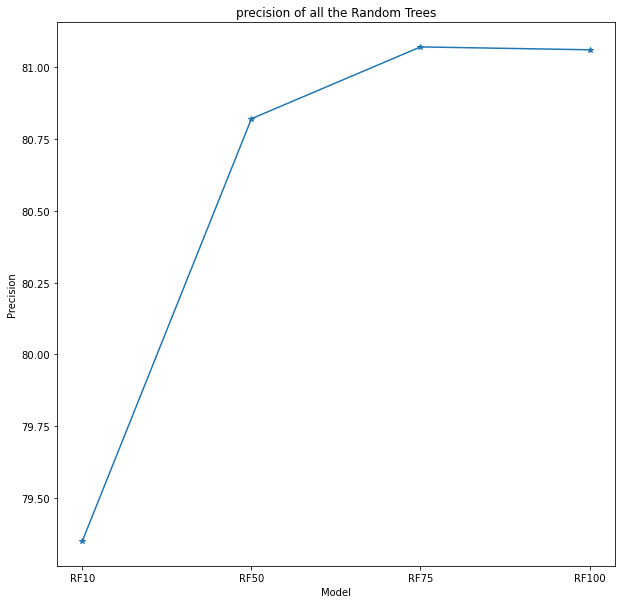

In [31]:
labels = ['RF10', 'RF50', 'RF75', 'RF100']
values = [rf10_precision, rf50_precision, rf75_precision, rf100_precision]

plt.figure(figsize = [10, 10])
plt.title('precision of all the Random Trees')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.plot(labels, values, '*-')
plt.show()

# Demonstração comparativa da saida de cada algoritmo

Como ja dito acima, esta formulação de plot utilizada aqui foi baseada no codigo [Credit Score Classification By Vishal Sai Gadge](https://www.kaggle.com/code/gadigevishalsai/credit-score-classification-eda-classification)

In [33]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Precision', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_precision[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤════════════════════════╤══════════════════╤═══════════════════╤════════════════╕
│   S.No. │ Classification Model   │   Model Accuracy │   Model Precision │   Model Recall │
╞═════════╪════════════════════════╪══════════════════╪═══════════════════╪════════════════╡
│       1 │ 1 - Nearest Neighbors  │            68.77 │             68.73 │          68.77 │
├─────────┼────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       2 │ 3 - Nearest Neighbors  │            68.63 │             69.05 │          68.63 │
├─────────┼────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       3 │ 5 - Nearest Neighbors  │            69    │             69.34 │          69    │
├─────────┼────────────────────────┼──────────────────┼───────────────────┼────────────────┤
│       4 │ 7 - Nearest Neighbors  │            69.34 │             69.62 │          69.34 │
├─────────┼────────────────────────┼──────────────────┼───────────────